#1. Data Scraping

In [ ]:
!pip install google-play-scraper
from google_play_scraper import app, reviews
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews_all

result= reviews_all(
    'com.openai.chatgpt',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST

    filter_score_with=None # defaults to None(means all score)

)

df = pd.DataFrame(result)
df.tail()

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.openai.chatgpt',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count = 5000,# defaults to 100
    filter_score_with=None # defaults to None(means all score)
)


df_gpt1 = pd.DataFrame(result)
df_gpt1.tail()

In [ ]:
df_gpt1.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,60c49f5a-c492-4c3b-a4a0-7e53e32254cd,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Very fun to experiment with. I really like how...,4,75,1.2024.151,2024-06-07 00:50:36,None,NaT,1.2024.151
1,aeea3665-913c-45e3-bb4c-5acef5df9c3b,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"ChatGPT itself is pretty good. However, this l...",2,75,1.2024.157,2024-06-11 19:53:04,None,NaT,1.2024.157
2,8b771d51-3924-44c2-9ba6-a6057adeb746,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,ChatGPT is a fantastic AI assistant! The app i...,5,231,1.2024.151,2024-06-05 06:06:45,None,NaT,1.2024.151
3,3d42d248-2b08-4716-be0b-ba4acc8a51b7,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,So far I've used this to design a beginners ca...,5,88,1.2024.157,2024-06-17 16:48:32,None,NaT,1.2024.157
4,6a148566-6326-4796-856b-a8696876ffbd,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,it does literally everything they said it coul...,5,1,1.2024.170,2024-06-29 04:57:19,None,NaT,1.2024.170


In [ ]:
gptscore = df['score'].value_counts()
print(gptscore)

In [ ]:
data = df[['userName', 'score', 'at', 'content']]
data.to_csv('gptallstarENG.csv', index = False)

#2. Data Preprocessing

In [ ]:
gpt = pd.read_csv("gptallstarENG.csv")
gpt.head(50)

,userName,score,at,content;
0,Ankur Pal,5.0,2024-04-26 12:16:25,Nice app.;
1,Shubham Madheshiya,5.0,2024-04-26 12:15:56,good working;
2,Zulfiqar Ali,5.0,2024-04-26 12:14:26,it's very helpful 😊;
3,Lwazi Mgabhi,5.0,2024-04-26 12:13:32,this app helps alot;
4,Sylvester Gerry,5.0,2024-04-26 12:13:25,great tool;
5,Akbar Hussain,5.0,2024-04-26 12:12:35,Not yet tried but going to try it;
6,Aboubakary Maumba,5.0,2024-04-26 12:12:22,it's perfect 👊;
7,WORLD & FOCUS,5.0,2024-04-26 12:11:39,nice app for future;
8,"Diwan Damor,5,2024-04-26 12:07:58,""1 second so...",NaN,NaN,NaN
9,Ramkumar S,5.0,2024-04-26 12:03:28,The best AI in market;


In [ ]:
gpt.tail()

,userName,score,at,content;
4175,Sk sijan 0 Sk sijan 0,1.0,2024-04-06 17:06:29,হি;
4176,Anna Porcella,1.0,2024-04-06 16:55:17,Dopo un po smette di funzionare... inutilizzab...
4177,Taylor tomaso,1.0,2024-04-06 16:49:39,You don't want my opinion.;
4178,Raman Kumar 5129,1.0,2024-04-06 16:35:28,great;
4179,Dirusith Diru,1.0,2024-04-06 16:23:40,This gpt Let's Ask question gives irrelevant a...


In [ ]:
gptscore = gpt['score'].value_counts()
print(gptscore)

In [ ]:
# Hitung jumlah baris yang memiliki setidaknya satu nilai null atau NaN di dalamnya
total_null_rows = gpt.isnull().any(axis=1).sum()

# Tampilkan jumlah baris yang memiliki setidaknya satu nilai null atau NaN di dalamnya
print("Jumlah baris yang memiliki setidaknya satu nilai null atau NaN di dalamnya:", total_null_rows)


Jumlah baris yang memiliki setidaknya satu nilai null atau NaN di dalamnya: 504


In [ ]:
gpt = gpt.dropna().reset_index(drop=True)
gpt.tail()

,userName,score,at,content;
3671,Sk sijan 0 Sk sijan 0,1.0,2024-04-06 17:06:29,হি;
3672,Anna Porcella,1.0,2024-04-06 16:55:17,Dopo un po smette di funzionare... inutilizzab...
3673,Taylor tomaso,1.0,2024-04-06 16:49:39,You don't want my opinion.;
3674,Raman Kumar 5129,1.0,2024-04-06 16:35:28,great;
3675,Dirusith Diru,1.0,2024-04-06 16:23:40,This gpt Let's Ask question gives irrelevant a...


cleaning

In [ ]:
import re

def clean_text(text):

  # Remove URLs (link removal)
  text = re.sub(r"http\S+", "", text)
  # Remove symbols, numbers, and extra spaces
  text = re.sub(r"[^\w\s]", "", text)
  # Repeated word
  text = re.sub(r"\s+", " ", text)
  # Leading & trailing space
  text = text.strip()
  # Remove double words (consecutive repetitions)
  text = re.sub(r"((\b\w+\b){2,})", r"\1", text)
  # Basic emoticon removal (limited approach)
  text = re.sub(r"[^a-zA-Z0-9\s\!\?\.]", "", text)

  return text

# Example usage
text = "This review is http://example.com for reference! It is very good!!  And has some unformatted characters like ☺"
cleaned_text = clean_text(text)
print(cleaned_text)


This review is for reference It is very good And has some unformatted characters like


In [ ]:
# Assuming the user reviews are in a column named "content"
gpt["cleaned_content"] = gpt["content;"].apply(clean_text)
gpt.tail(50)

,userName,score,at,content;,cleaned_content
3626,Kalu Lloyd,1.0,2024-04-08 09:01:28,Doesn't work anymore. Keeps telling me an erro...,Doesnt work anymore Keeps telling me an error ...
3627,Anaza Blessing,1.0,2024-04-08 08:20:29,Very good. 👍;,Very good
3628,Carl Darrel Basa,1.0,2024-04-08 08:06:08,This app is always confuse and provide wrong a...,This app is always confuse and provide wrong a...
3629,TOP 1 ARMY,1.0,2024-04-08 08:00:17,good but not every thing;,good but not every thing
3630,Divesh bodhane,1.0,2024-04-08 06:16:50,very bad;,very bad
3631,PlumpRaptor,1.0,2024-04-08 05:01:08,fart;,fart
3632,April Ebaler,1.0,2024-04-08 03:30:19,good;,good
3633,Michael,1.0,2024-04-08 03:09:57,Its faster;,Its faster
3634,Sameeha Sameeha,1.0,2024-04-08 02:42:27,Good;,Good
3635,Mukesh Kumar,1.0,2024-04-08 02:10:03,very useful app;,very useful app


case folding

In [ ]:
def caseFolding(text):
  text = text.lower()
  return text

In [ ]:
gpt['casefolding'] = gpt['cleaned_content'].apply(caseFolding)
gpt.head(30)

,userName,score,at,content;,cleaned_content,casefolding
0,Ankur Pal,5.0,2024-04-26 12:16:25,Nice app.;,Nice app,nice app
1,Shubham Madheshiya,5.0,2024-04-26 12:15:56,good working;,good working,good working
2,Zulfiqar Ali,5.0,2024-04-26 12:14:26,it's very helpful 😊;,its very helpful,its very helpful
3,Lwazi Mgabhi,5.0,2024-04-26 12:13:32,this app helps alot;,this app helps alot,this app helps alot
4,Sylvester Gerry,5.0,2024-04-26 12:13:25,great tool;,great tool,great tool
5,Akbar Hussain,5.0,2024-04-26 12:12:35,Not yet tried but going to try it;,Not yet tried but going to try it,not yet tried but going to try it
6,Aboubakary Maumba,5.0,2024-04-26 12:12:22,it's perfect 👊;,its perfect,its perfect
7,WORLD & FOCUS,5.0,2024-04-26 12:11:39,nice app for future;,nice app for future,nice app for future
8,Ramkumar S,5.0,2024-04-26 12:03:28,The best AI in market;,The best AI in market,the best ai in market
9,Pretty Eva,5.0,2024-04-26 12:03:23,extraordinary I so much love this app honestly...,extraordinary I so much love this app honestly...,extraordinary i so much love this app honestly...


tokenizing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download model tokenisasi kalimat dari NLTK
nltk.download('punkt')
# Tokenisasi kalimat pada kolom 'content'
def tokenize_sentences(text):
    return word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
  gpt['tokenized'] = gpt['casefolding'].apply(tokenize_sentences)
  gpt.head(70)

,userName,score,at,content;,cleaned_content,casefolding,tokenized
0,Ankur Pal,5.0,2024-04-26 12:16:25,Nice app.;,Nice app,nice app,"[nice, app]"
1,Shubham Madheshiya,5.0,2024-04-26 12:15:56,good working;,good working,good working,"[good, working]"
2,Zulfiqar Ali,5.0,2024-04-26 12:14:26,it's very helpful 😊;,its very helpful,its very helpful,"[its, very, helpful]"
3,Lwazi Mgabhi,5.0,2024-04-26 12:13:32,this app helps alot;,this app helps alot,this app helps alot,"[this, app, helps, alot]"
4,Sylvester Gerry,5.0,2024-04-26 12:13:25,great tool;,great tool,great tool,"[great, tool]"
...,...,...,...,...,...,...,...
65,Subham Rakhecha,5.0,2024-04-26 09:50:50,this is the best app if u have any doubts on s...,this is the best app if u have any doubts on s...,this is the best app if u have any doubts on s...,"[this, is, the, best, app, if, u, have, any, d..."
66,Rajendra Thorat,5.0,2024-04-26 09:48:36,Its very much clever than Google search;,Its very much clever than Google search,its very much clever than google search,"[its, very, much, clever, than, google, search]"
67,Aanand Kumar Yaduvanshi,5.0,2024-04-26 09:48:01,thank you 👍👍;,thank you,thank you,"[thank, you]"
68,HAZRAT GUL,5.0,2024-04-26 09:47:26,This is a very awesome and amazing app. Every ...,This is a very awesome and amazing app Every t...,this is a very awesome and amazing app every t...,"[this, is, a, very, awesome, and, amazing, app..."


stopword

In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Menggunakan stopwords untuk bahasa Inggris
stop_words_english = set(stopwords.words('english'))

# Fungsi untuk melakukan filtering dengan stopwords bahasa Inggris
def filter_stopwords(text):
    # Tokenisasi kata
    #tokens = word_tokenize(text)
    # Filtering dengan stopwords bahasa Inggris
    filtered_tokens = [word for word in text if word.lower() not in stop_words_english]
    # Menggabungkan kembali kata-kata yang sudah difilter
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Melakukan filtering dengan stopwords bahasa Inggris pada kolom 'normalized_review'
gpt['filtered_review'] = gpt['tokenized'].apply(filter_stopwords)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
gpt.head(60)

,userName,score,at,content;,cleaned_content,casefolding,tokenized,filtered_review
0,Ankur Pal,5.0,2024-04-26 12:16:25,Nice app.;,Nice app,nice app,"[nice, app]",nice app
1,Shubham Madheshiya,5.0,2024-04-26 12:15:56,good working;,good working,good working,"[good, working]",good working
2,Zulfiqar Ali,5.0,2024-04-26 12:14:26,it's very helpful 😊;,its very helpful,its very helpful,"[its, very, helpful]",helpful
3,Lwazi Mgabhi,5.0,2024-04-26 12:13:32,this app helps alot;,this app helps alot,this app helps alot,"[this, app, helps, alot]",app helps alot
4,Sylvester Gerry,5.0,2024-04-26 12:13:25,great tool;,great tool,great tool,"[great, tool]",great tool
5,Akbar Hussain,5.0,2024-04-26 12:12:35,Not yet tried but going to try it;,Not yet tried but going to try it,not yet tried but going to try it,"[not, yet, tried, but, going, to, try, it]",yet tried going try
6,Aboubakary Maumba,5.0,2024-04-26 12:12:22,it's perfect 👊;,its perfect,its perfect,"[its, perfect]",perfect
7,WORLD & FOCUS,5.0,2024-04-26 12:11:39,nice app for future;,nice app for future,nice app for future,"[nice, app, for, future]",nice app future
8,Ramkumar S,5.0,2024-04-26 12:03:28,The best AI in market;,The best AI in market,the best ai in market,"[the, best, ai, in, market]",best ai market
9,Pretty Eva,5.0,2024-04-26 12:03:23,extraordinary I so much love this app honestly...,extraordinary I so much love this app honestly...,extraordinary i so much love this app honestly...,"[extraordinary, i, so, much, love, this, app, ...",extraordinary much love app honestly app giving


normalization eng

In [ ]:
from textblob import TextBlob
nltk.download('wordnet')
# Fungsi untuk normalisasi teks dengan singularize dan word correction
def normalize_text(text):
    # Membuat objek TextBlob dari teks
    blob = TextBlob(text)

    # Melakukan singularize dan word correction pada setiap kata dalam teks
    normalized_words = [word.singularize().lemmatize() for word in blob.words]

    # Menggabungkan kata-kata yang telah dinormalisasi menjadi satu teks utuh
    normalized_text = ' '.join(normalized_words)

    return normalized_text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
gpt['normalized_review'] = gpt['filtered_review'].apply(normalize_text)

In [ ]:
gpt.head(80)

stemming

In [ ]:
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

# Inisialisasi Porter Stemmer
porter = PorterStemmer()

# Fungsi untuk melakukan stemming pada kalimat
def stem_text(text):
    #text = ' '.join(text)
    # Stemming kata dalam kalimat
    stemmed_text = ' '.join([porter.stem(word) for word in text.split()])
    return stemmed_text

# Contoh DataFrame gpt dengan kolom 'review'
# gpt = pd.read_csv('gpt.csv')

# Melakukan stemming pada kolom 'review'
gpt['stemmed_review'] = gpt['normalized_review'].apply(stem_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
gpt.head(10)

,userName,score,at,content,cleaned_content,casefolding,tokenized,filtered_review,normalized_review,stemmed_review,sentiment_score,sentiment
0,A Google user,5,2024-07-14 15:56:32,useful app wonderful preferences it helped me ...,useful app wonderful preferences it helped me ...,useful app wonderful preferences it helped me ...,"[useful, app, wonderful, preferences, it, help...",useful app wonderful preferences helped lot as...,useful app wonderful preference helped lot ass...,use app wonder prefer help lot assign,2.0,positive
1,A Google user,5,2024-07-14 15:55:02,nice,nice,nice,[nice],nice,nice,nice,3.0,positive
2,A Google user,5,2024-07-14 15:53:57,good,good,good,[good],good,good,good,3.0,positive
3,A Google user,5,2024-07-14 15:53:44,I now have an editor for my writing that does ...,I now have an editor for my writing that does ...,i now have an editor for my writing that does ...,"[i, now, have, an, editor, for, my, writing, t...",editor writing cost fortune,editor writing cost fortune,editor write cost fortun,0.0,negative
4,A Google user,5,2024-07-14 15:53:05,"He knows everything. When I face a problem, I ...",He knows everything When I face a problem I as...,he knows everything when i face a problem i as...,"[he, knows, everything, when, i, face, a, prob...",knows everything face problem ask chat gpt sol...,know everything face problem ask chat gpt solf...,know everyth face problem ask chat gpt solf pr...,-1.0,negative
5,A Google user,5,2024-07-14 15:52:51,Excellent creativity,Excellent creativity,excellent creativity,"[excellent, creativity]",excellent creativity,excellent creativity,excel creativ,0.0,negative
6,A Google user,1,2024-07-14 15:51:51,It is so slow and disturb,It is so slow and disturb,it is so slow and disturb,"[it, is, so, slow, and, disturb]",slow disturb,slow disturb,slow disturb,-2.0,negative
7,A Google user,5,2024-07-14 15:49:45,that make me smart 🤑🤑🤑🤑,that make me smart,that make me smart,"[that, make, me, smart]",make smart,make smart,make smart,1.0,positive
8,A Google user,5,2024-07-14 15:48:02,very very good,very very good,very very good,"[very, very, good]",good,good,good,3.0,positive
9,A Google user,5,2024-07-14 15:46:00,it is soo helpful for study .,it is soo helpful for study,it is soo helpful for study,"[it, is, soo, helpful, for, study]",soo helpful study,soo helpful study,soo help studi,2.0,positive


#Lexicon ENG

In [ ]:
!pip install afinn
from afinn import Afinn

# Inisialisasi objek Afinn
afinn = Afinn()

# Fungsi untuk menganalisis sentimen teks
def analyze_sentiment(text):

    sentiment_score = afinn.score(text)

    # Menentukan label sentimen berdasarkan skor
    if sentiment_score > 0:
        sentiment_label = 'positive'
    else:
        sentiment_label = 'negative'

    return sentiment_score, sentiment_label

# Melakukan analisis sentimen pada kolom 'review'
gpt['sentiment_score'], gpt['sentiment'] = zip(*gpt['stemmed_review'].apply(analyze_sentiment))

# Menampilkan hasil
print(gpt[['stemmed_review', 'sentiment_score', 'sentiment']])


                                         stemmed_review  sentiment_score  \
0                                              nice app              3.0   
1                                             good work              3.0   
2                                                  help              2.0   
3                                         app help alot              2.0   
4                                            great tool              3.0   
...                                                 ...              ...   
3671                                                                 0.0   
3672        dopo un po smett di funzionar inutilizzabil              0.0   
3673                                  dont want opinion              1.0   
3674                                              great              3.0   
3675  gpt let ask question gife irrelev answer matte...             -2.0   

     sentiment  
0     positive  
1     positive  
2     positive  
3     positive  
4 

In [ ]:
gpt.tail(70)

,userName,score,at,content,cleaned_content,casefolding,tokenized,filtered_review,normalized_review,stemmed_review,vader_sentiment
9919,"49, Sushmita Dutta 9,E",5,2024-03-31 04:42:06,ChatGPT is awesome❤️ like it is my virtual tea...,ChatGPT is awesome like it is my virtual teach...,chatgpt is awesome like it is my virtual teach...,"[chatgpt, is, awesome, like, it, is, my, virtu...",chatgpt awesome like virtual teacher helps cle...,chatgpt awesome like virtual teacher help clea...,chatgpt awesom like virtual teacher help clear...,positive
9920,Faisal Mahmud,5,2024-06-28 13:25:42,excellent. good feedback every time,excellent good feedback every time,excellent good feedback every time,"[excellent, good, feedback, every, time]",excellent good feedback every time,excellent good feedback every time,excel good feedback everi time,positive
9921,Ujjawal Mishra,4,2023-12-30 15:40:36,"If I were to suggest features, I'd consider: E...",If I were to suggest features Id consider Expa...,if i were to suggest features id consider expa...,"[if, i, were, to, suggest, features, id, consi...",suggest features id consider expanded media su...,suggest feature id consider expanded medium su...,suggest featur id consid expand medium support...,positive
9922,ARMAN KHAN,3,2024-05-07 10:13:11,chat gpt is the best platform for knowledge an...,chat gpt is the best platform for knowledge an...,chat gpt is the best platform for knowledge an...,"[chat, gpt, is, the, best, platform, for, know...",chat gpt best platform knowledge fast information,chat gpt best platform knowledge fast information,chat gpt best platform knowledg fast inform,positive
9923,Manju Bajpai,4,2024-04-25 09:17:02,It's correct almost everytime but sometimes gi...,Its correct almost everytime but sometimes giv...,its correct almost everytime but sometimes giv...,"[its, correct, almost, everytime, but, sometim...",correct almost everytime sometimes gives fooli...,correct almost everytime sometime gife foolish...,correct almost everytim sometim gife foolish a...,negative
...,...,...,...,...,...,...,...,...,...,...,...
9994,Eddie Celis,5,2024-04-08 16:46:24,Great resource for historical and biographical...,Great resource for historical and biographical...,great resource for historical and biographical...,"[great, resource, for, historical, and, biogra...",great resource historical biographical facts e...,great resource historical biographical fact ev...,great resourc histor biograph fact event well ...,positive
9995,Priscilla Sarfo,5,2024-04-25 11:03:00,I just love this app....It's actually my new b...,I just love this appIts actually my new best f...,i just love this appits actually my new best f...,"[i, just, love, this, appits, actually, my, ne...",love appits actually new best friend accurate ...,love appit actually new best friend accurate q...,love appit actual new best friend accur qualit...,positive
9997,Luluza Nxumalo,5,2024-05-11 18:35:53,I love this app it is so fast and makes a good...,I love this app it is so fast and makes a good...,i love this app it is so fast and makes a good...,"[i, love, this, app, it, is, so, fast, and, ma...",love app fast makes good friend guys highly re...,love app fast make good friend guy highly reco...,love app fast make good friend guy highli reco...,positive
9998,Anna (Speble),4,2024-01-10 21:52:21,Dyslexic and ADHD. I am overwhelmed easily whe...,Dyslexic and ADHD I am overwhelmed easily when...,dyslexic and adhd i am overwhelmed easily when...,"[dyslexic, and, adhd, i, am, overwhelmed, easi...",dyslexic adhd overwhelmed easily sending email...,dyslexic adhd overwhelmed easily sending email...,dyslex adhd overwhelm easili send email matter...,positive


In [ ]:
sent = gpt["sentiment"].value_counts()
print(sent)

sentiment
positive    2052
negative    1624
Name: count, dtype: int64


#Data Processing

Data Split

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = gpt['stemmed_review']  # Misalnya, kolom 'stemmed_review' adalah fitur
y = gpt['sentiment']  # Misalnya, kolom 'sentiment' adalah target

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Cetak ukuran data latih dan data uji
print("Ukuran data latih:", X_train.shape[0])
print("Ukuran data uji:", X_test.shape[0])


Ukuran data latih: 3308
Ukuran data uji: 368


In [ ]:
gpt.tail()

,userName,score,at,content;,cleaned_content,casefolding,filtered_review,normalized_review,stemmed_review,tokenized,sentiment,tokenized_text
3671,Sk sijan 0 Sk sijan 0,1.0,2024-04-06 17:06:29,হি;,,,,,,[],neutral,
3672,Anna Porcella,1.0,2024-04-06 16:55:17,Dopo un po smette di funzionare... inutilizzab...,Dopo un po smette di funzionare inutilizzabile,dopo un po smette di funzionare inutilizzabile,dopo un po smette di funzionare inutilizzabile,dopo un po smette di funzionare inutilizzabile,dopo un po smett di funzionar inutilizzabil,"[dopo, un, po, smett, di, funzionar, inutilizz...",neutral,dopo un po smett di funzionar inutilizzabil
3673,Taylor tomaso,1.0,2024-04-06 16:49:39,You don't want my opinion.;,You dont want my opinion,you dont want my opinion,dont want opinion,dont want opinion,dont want opinion,"[dont, want, opinion]",positive,dont want opinion
3674,Raman Kumar 5129,1.0,2024-04-06 16:35:28,great;,great,great,great,great,great,[great],positive,great
3675,Dirusith Diru,1.0,2024-04-06 16:23:40,This gpt Let's Ask question gives irrelevant a...,This gpt Lets Ask question gives irrelevant an...,this gpt lets ask question gives irrelevant an...,gpt lets ask question gives irrelevant answers...,gpt lets ask question gives irrelevant answers...,gpt let ask question give irrelev answer matte...,"[gpt, let, ask, question, give, irrelev, answe...",negative,gpt let ask question give irrelev answer matte...


In [ ]:
gpt.to_csv('gptpreprocessENG.csv', index=False)

tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi objek TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Mengubah teks menjadi representasi TF-IDF untuk data latih
X_train_tfidf = tfidf_vectorizer.fit_transform(gpt['stemmed_review'].iloc[X_train.index])

# Mengubah teks menjadi representasi TF-IDF untuk data uji
X_test_tfidf = tfidf_vectorizer.transform(gpt['stemmed_review'].iloc[X_test.index])

# Melihat dimensi dari matriks TF-IDF
print("Dimensi matriks TF-IDF untuk data latih:", X_train_tfidf.shape)
print("Dimensi matriks TF-IDF untuk data uji:", X_test_tfidf.shape)


Dimensi matriks TF-IDF untuk data latih: (3308, 2235)
Dimensi matriks TF-IDF untuk data uji: (368, 2235)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes menggunakan data latih
nb_classifier.fit(X_train_tfidf, y_train)

# Melakukan prediksi sentimen pada data uji
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluasi kinerja model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.91      0.72      0.80       153
    positive       0.83      0.95      0.88       215

    accuracy                           0.85       368
   macro avg       0.87      0.83      0.84       368
weighted avg       0.86      0.85      0.85       368



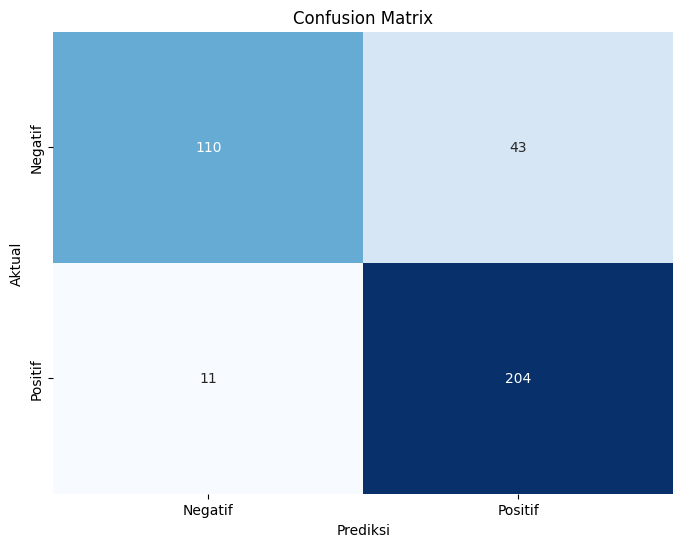

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


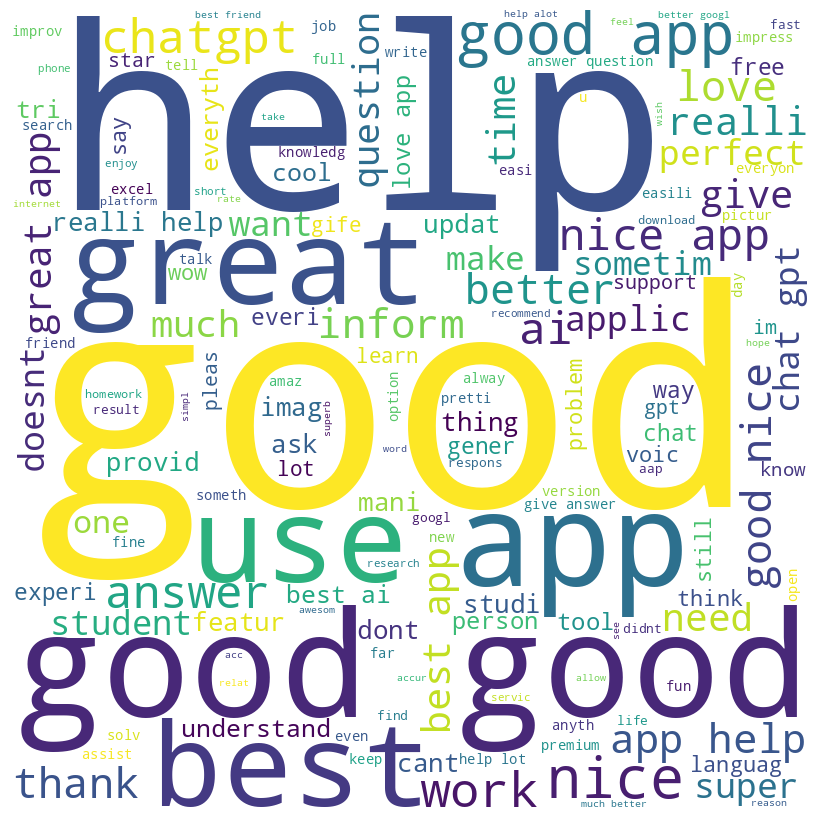

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil teks dari kolom 'review' untuk sentimen positif
positive_text = ' '.join(gpt[gpt['sentiment'] == 'positive']['stemmed_review'])


from wordcloud import STOPWORDS

# Set stopwords dari WordCloud untuk bahasa Inggris
stopwords = set(STOPWORDS)

# Inisialisasi WordCloud
wordcloud_positive = WordCloud(width=800, height=800,
                               background_color='white',
                               stopwords=stopwords,
                               min_font_size=10).generate(positive_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


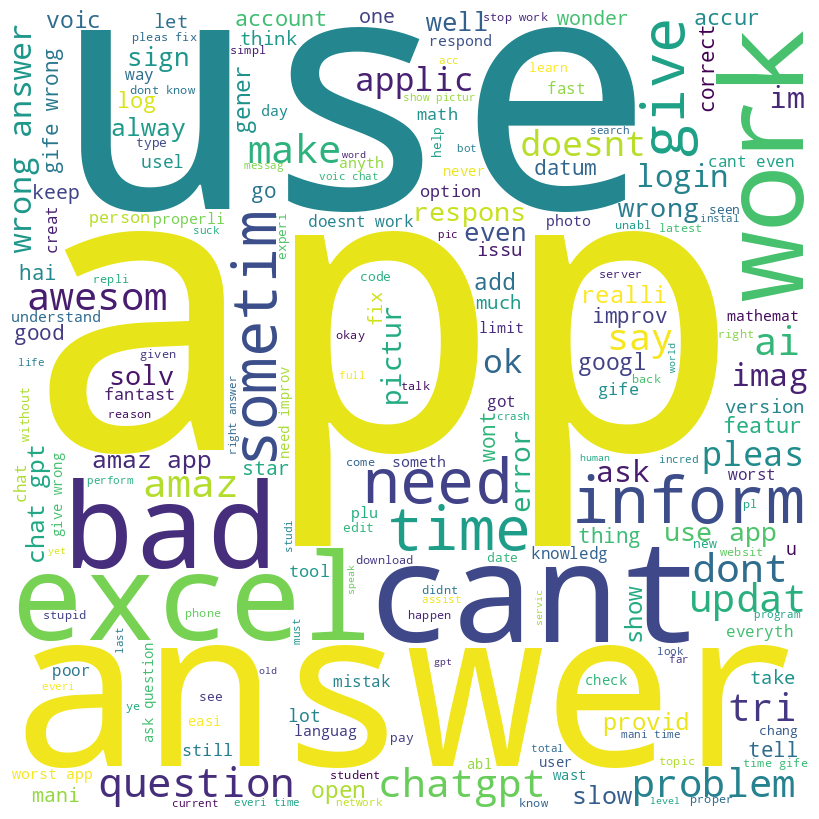

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil teks dari kolom 'review' untuk sentimen negatif
negative_text = ' '.join(gpt[gpt['sentiment'] == 'negative']['stemmed_review'])

# Inisialisasi WordCloud
wordcloud_negative = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


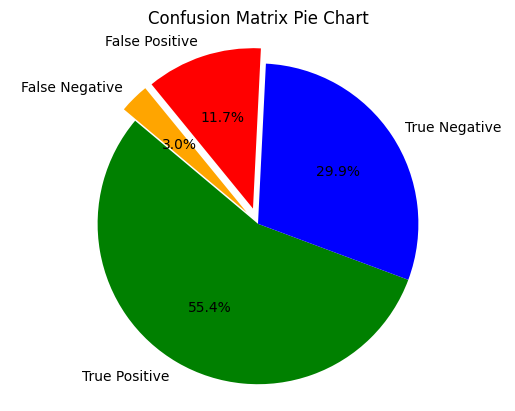

In [ ]:
import matplotlib.pyplot as plt

# Jumlah True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN)
TP = 204  # Jumlah True Positive (dari kelas negative)
TN = 110  # Jumlah True Negative (dari kelas positive)
FP = 43   # Jumlah False Positive (dari kelas negative)
FN = 11   # Jumlah False Negative (dari kelas positive)

# Buat diagram pie
labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']
sizes = [TP, TN, FP, FN]
colors = ['green', 'blue', 'red', 'orange']
explode = (0, 0, 0.1, 0.1)  # Pisahkan potongan 'False Positive' dan 'False Negative'
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan lingkaran berbentuk lingkaran
plt.title('Confusion Matrix Pie Chart')
plt.show()


#TESTING ONLY

Data Split

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = gpt['stemmed_review']  # Misalnya, kolom 'stemmed_review' adalah fitur
y = gpt['sentiment']  # Misalnya, kolom 'sentiment' adalah target

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Cetak ukuran data latih dan data uji
print("Ukuran data latih:", X_train.shape[0])
print("Ukuran data uji:", X_test.shape[0])


Ukuran data latih: 3308
Ukuran data uji: 368


tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi objek TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Mengubah teks menjadi representasi TF-IDF untuk data latih
X_train_tfidf = tfidf_vectorizer.fit_transform(gpt['stemmed_review'].iloc[X_train.index])

# Mengubah teks menjadi representasi TF-IDF untuk data uji
X_test_tfidf = tfidf_vectorizer.transform(gpt['stemmed_review'].iloc[X_test.index])

# Melihat dimensi dari matriks TF-IDF
print("Dimensi matriks TF-IDF untuk data latih:", X_train_tfidf.shape)
print("Dimensi matriks TF-IDF untuk data uji:", X_test_tfidf.shape)


Dimensi matriks TF-IDF untuk data latih: (3308, 2235)
Dimensi matriks TF-IDF untuk data uji: (368, 2235)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Inisialisasi model Naive Bayes
nb_classifier = MultinomialNB()

# Melatih model Naive Bayes menggunakan data latih
nb_classifier.fit(X_train_tfidf, y_train)

# Melakukan prediksi sentimen pada data uji
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluasi kinerja model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.91      0.72      0.80       153
    positive       0.83      0.95      0.88       215

    accuracy                           0.85       368
   macro avg       0.87      0.83      0.84       368
weighted avg       0.86      0.85      0.85       368



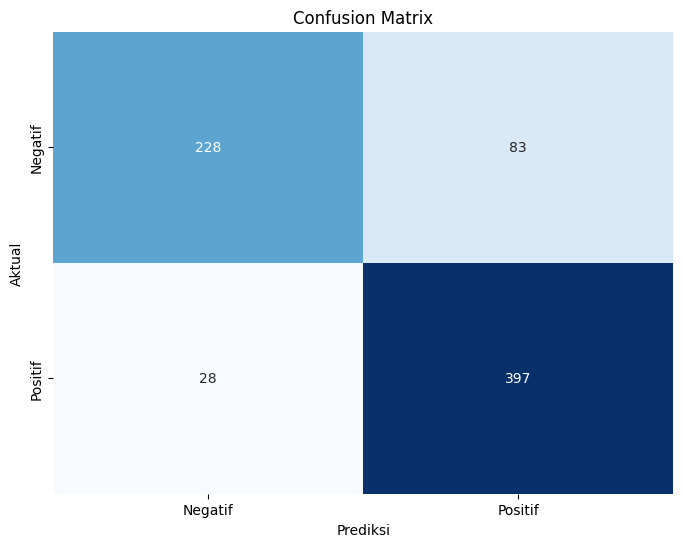

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


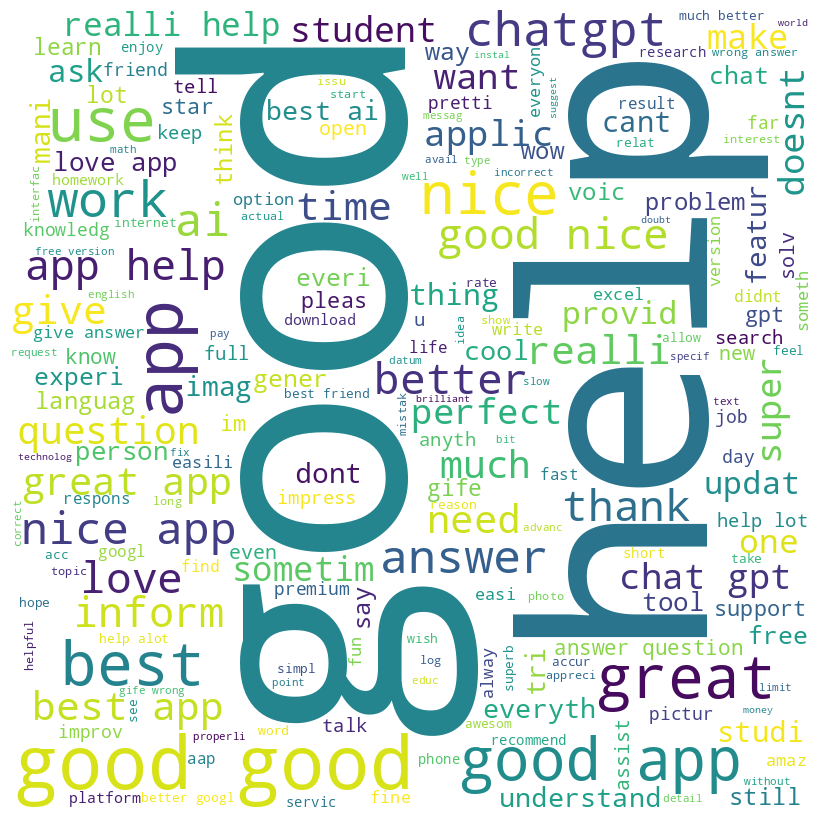

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil teks dari kolom 'review' untuk sentimen positif
positive_text = ' '.join(gpt[gpt['sentiment'] == 'positive']['stemmed_review'])


from wordcloud import STOPWORDS

# Set stopwords dari WordCloud untuk bahasa Inggris
stopwords = set(STOPWORDS)

# Inisialisasi WordCloud
wordcloud_positive = WordCloud(width=800, height=800,
                               background_color='white',
                               stopwords=stopwords,
                               min_font_size=10).generate(positive_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


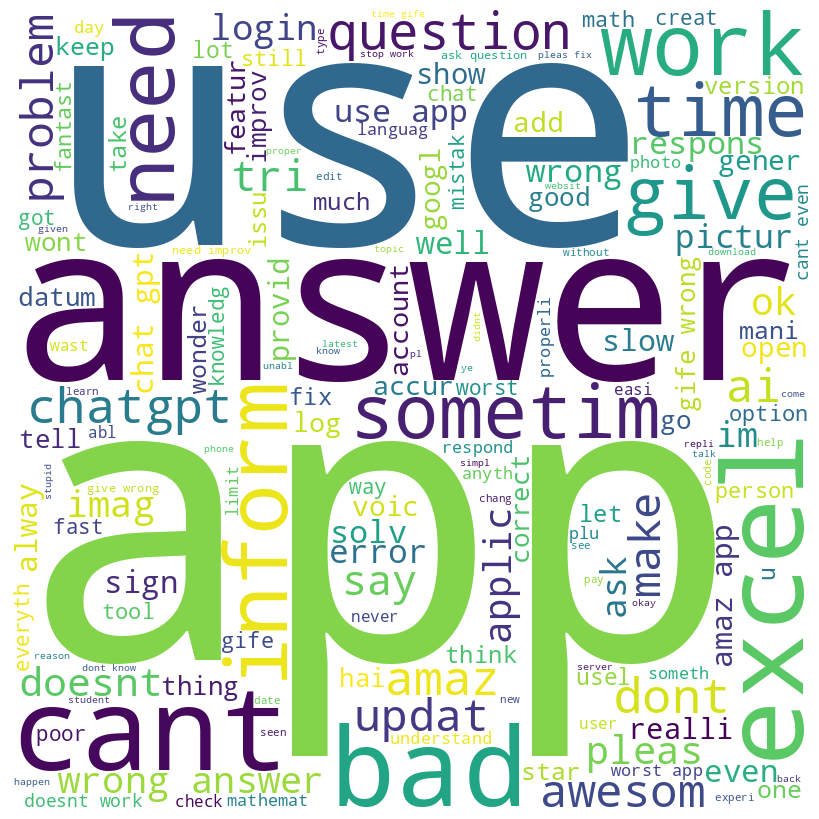

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil teks dari kolom 'review' untuk sentimen negatif
negative_text = ' '.join(gpt[gpt['sentiment'] == 'negative']['stemmed_review'])

# Inisialisasi WordCloud
wordcloud_negative = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


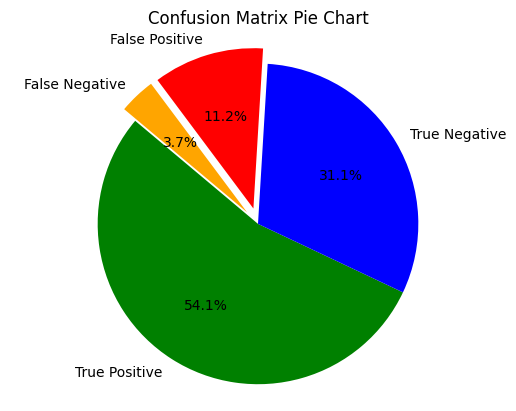

In [ ]:
import matplotlib.pyplot as plt

# Jumlah True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN)
TP = 397  # Jumlah True Positive (dari kelas negative)
TN = 228  # Jumlah True Negative (dari kelas positive)
FP = 82   # Jumlah False Positive (dari kelas negative)
FN = 27   # Jumlah False Negative (dari kelas positive)

# Buat diagram pie
labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']
sizes = [TP, TN, FP, FN]
colors = ['green', 'blue', 'red', 'orange']
explode = (0, 0, 0.1, 0.1)  # Pisahkan potongan 'False Positive' dan 'False Negative'
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan lingkaran berbentuk lingkaran
plt.title('Confusion Matrix Pie Chart')
plt.show()
